## 비지도학습 (Unsupervised Learning)
- 차원축소
- 군집화(Clustering)

### 차원 축소
- PCA: 고차원에서 저차원으로 축소하는 선형 투영 기법

In [1]:
# 라이브러리 불러오기
import pandas as pd
# 와인 데이터 불러오기
from sklearn.datasets import load_wine
dataset = load_wine()
data = pd.DataFrame(dataset.data, columns=dataset.feature_names)

In [4]:
# 데이터 샘플 확인
print(data.shape) # (178, 13) -> 178개의 데이터와 13개의 피처
data.head()

(178, 13)


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


### 스케일링

In [7]:
# 스탠다드 스케일링
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data = scaler.fit_transform(data)
data[:3]

array([[ 1.51861254, -0.5622498 ,  0.23205254, -1.16959318,  1.91390522,
         0.80899739,  1.03481896, -0.65956311,  1.22488398,  0.25171685,
         0.36217728,  1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, -2.49084714,  0.01814502,
         0.56864766,  0.73362894, -0.82071924, -0.54472099, -0.29332133,
         0.40605066,  1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, -0.2687382 ,  0.08835836,
         0.80899739,  1.21553297, -0.49840699,  2.13596773,  0.26901965,
         0.31830389,  0.78858745,  1.39514818]])

In [9]:
# df변수에 데이터 복사
# PCA 하면서 계속 데이터를 사용하기 때문에
df = data.copy()

### PCA

In [13]:
# 라이브러리 불러오기
from sklearn.decomposition import PCA
# PCA
pca = PCA(n_components=2) # 2개로 차원 축소
# PCA 변환
df = pca.fit_transform(df)
df.shape # (178, 2)

(178, 2)

In [14]:
df[:3]

array([[ 3.31675081,  1.44346263],
       [ 2.20946492, -0.33339289],
       [ 2.51674015,  1.0311513 ]])

### PCA(2차원) 시각화

In [15]:
# 라이브러리 불러오기
import matplotlib.pyplot as plt
# 데이터 프레임 변환
df = pd.DataFrame(df)
df.head()

,0,1
0,3.316751,1.443463
1,2.209465,-0.333393
2,2.516740,1.031151
3,3.757066,2.756372
4,1.008908,0.869831


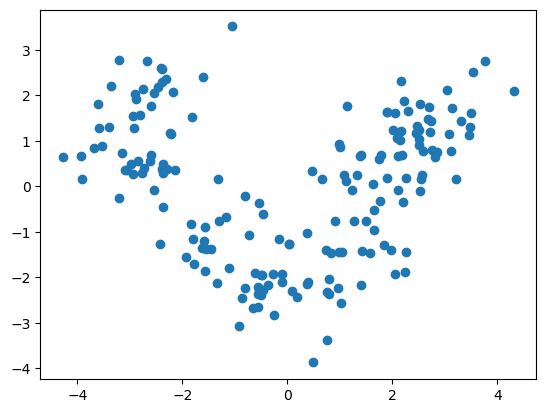

In [16]:
# scatter 이용하여 시각화 하기
plt.scatter(df.iloc[:,0], df.iloc[:,1])

In [17]:
# dataset.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

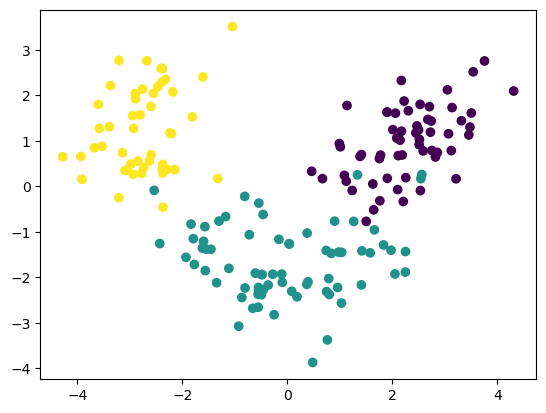

In [18]:
plt.scatter(df.iloc[:,0], df.iloc[:,1], c=dataset.target)

In [22]:
# 3개를 2개로 줄였을 때 설명력이 어떻게 되는지
print(pca.explained_variance_ratio_)
# 0 피처 설명력 0.36198848, 1피처 설명력 0.1920749


print(pca.explained_variance_ratio_.sum()) # 두 개의 피처를 합쳤을 때 0.5540633835693526 정도의 설명력을 가짐

[0.36198848 0.1920749 ]
0.5540633835693526


### 지도학습 (PCA 전후 비교) -> 랜덤포레스트

In [25]:
# PCA 후 데이터로 머신러닝 진행
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

model = RandomForestClassifier(random_state=2022)
cross_val_score(model, df, dataset.target, scoring='accuracy', cv=5).mean()

0.9492063492063492

In [26]:
# PCA 전 데이터로 머신러닝 진행
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

model = RandomForestClassifier(random_state=2022)
cross_val_score(model, data, dataset.target, scoring='accuracy', cv=5).mean()

0.9553968253968254

PCA가 진행돼도 설명력을 갖추고 있다고 판단

### PCA(3차원) 시각화

In [27]:
df = data.copy()
pca = PCA(n_components=3)
pca.fit_transform(df)
df = pd.DataFrame(df)

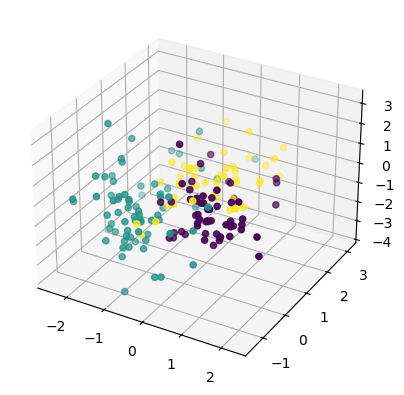

In [30]:
# 시각화 3차원
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df.iloc[:,0], df.iloc[:,1], df.iloc[:,2], c=dataset.target)

### 기본적인 PCA외 다른 PCA 실습
### 점진적 PCA
- 데이터 셋이 큰 경우 사용(배치를 통해 점진적 수행)

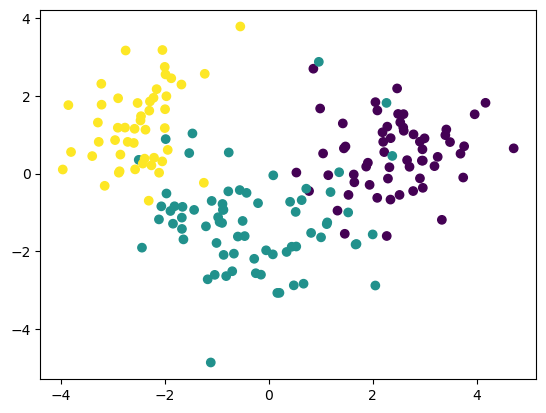

In [35]:
from sklearn.decomposition import IncrementalPCA
df = data.copy()
pca = IncrementalPCA(n_components=2, batch_size=16)
df = pca.fit_transform(df)
df = pd.DataFrame(df)
plt.scatter(df.iloc[:,0], df.iloc[:,1], c=dataset.target)

In [36]:
# 데이터 설명
print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.sum())

[0.3400206  0.15239134]
0.49241194001544053


### 희소 PCA
- 적절한 희소성을 유지(alpha값으로 조정)
- 오버피팅 방지

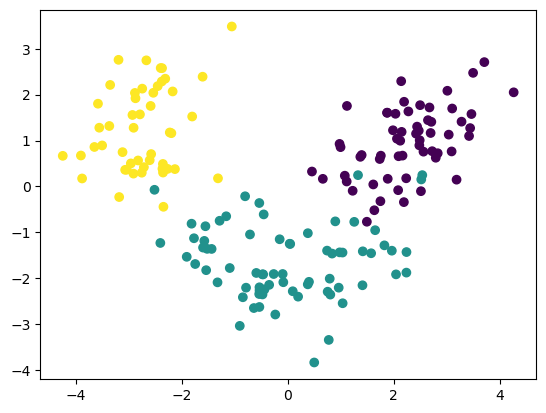

In [37]:
from sklearn.decomposition import SparsePCA
df = data.copy()
pca = SparsePCA(n_components=2, alpha=0.01)
df = pca.fit_transform(df)
df = pd.DataFrame(df)
plt.scatter(df.iloc[:,0], df.iloc[:,1], c=dataset.target)

## 커널 PCA
- 비선형으로 차원 축소

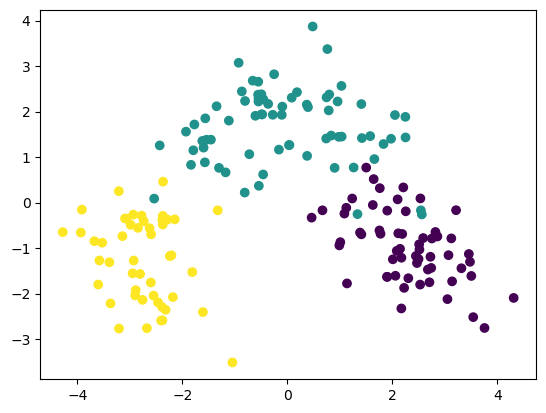

In [38]:
from sklearn.decomposition import KernelPCA
df = data.copy()
pca = KernelPCA(n_components=2)
df = pca.fit_transform(df)
df = pd.DataFrame(df)
plt.scatter(df.iloc[:,0], df.iloc[:,1], c=dataset.target)

## SVD(Singular Value Decomposition) 특이값 분해
- 행렬을 특정한 구조로 분해하는 방식
- 신호 처리와 통계학 등의 분야에서 자주 사용됨

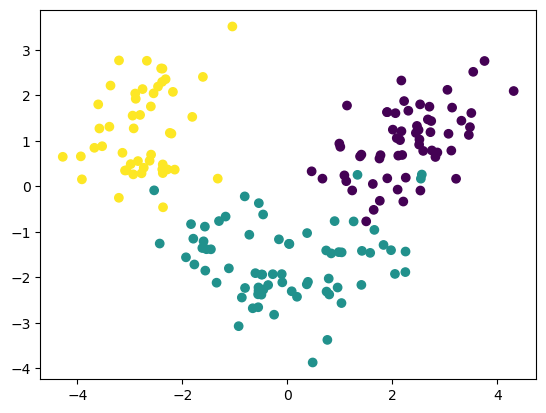

In [41]:
from sklearn.decomposition import TruncatedSVD
df = data.copy()
pca = TruncatedSVD(n_components=2)
df = pca.fit_transform(df)
df = pd.DataFrame(df)
plt.scatter(df.iloc[:,0], df.iloc[:,1], c=dataset.target)

## 군집화